In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os 
import sklearn
import shap 
import time
import math
import seaborn as sns
import pathlib
import statistics

In [2]:
font_size_plot = 22
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['figure.labelweight'] = 'bold'
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['font.size'] = font_size_plot
plt.rcParams['axes.formatter.useoffset'] = False

path = os.path.abspath('')
os.chdir(f'{path}')

pathlib.Path(f'results').mkdir(parents=True,exist_ok=True)

mean (of seeds) standard deviation (of orders) for each method and meta model

normal prediction std

In [3]:
normal_prediction_dataframe = pd.read_csv('std data\\stdnormalpredictiondataframe.csv')
unique_method_list = normal_prediction_dataframe['METHOD'].unique().tolist()
unique_meta_list = normal_prediction_dataframe['META'].unique().tolist()
normal_prediction_std_dataframe = pd.DataFrame()
for unique_method in unique_method_list:
    for unique_meta in unique_meta_list:
        interested_dataframe = normal_prediction_dataframe[(normal_prediction_dataframe['METHOD']==unique_method)&(normal_prediction_dataframe['META']==unique_meta)]
        interested_dataframe_not_std = interested_dataframe[['SEED','METHOD','META']]
        interested_dataframe_std = interested_dataframe.drop(['SEED','METHOD','META'],axis='columns')
        interested_dataframe_std = interested_dataframe_std.mean()
        mean_std_dataframe = interested_dataframe_std.to_frame().transpose()
        mean_std_dataframe['METHOD'] = unique_method
        mean_std_dataframe['META'] = unique_meta
        normal_prediction_std_dataframe = pd.concat([mean_std_dataframe,normal_prediction_std_dataframe],axis='rows')
normal_prediction_std_dataframe = normal_prediction_std_dataframe.reset_index(drop=True)
# rearrange columns
for item in ['META','METHOD']:
    normal_prediction_std_dataframe_pop = normal_prediction_std_dataframe.pop(item)
    normal_prediction_std_dataframe.insert(column=item,value=normal_prediction_std_dataframe_pop,loc=0)
normal_prediction_std_dataframe = normal_prediction_std_dataframe.rename(dict(MAE='MEAN STD MAE',MSE='MEAN STD MSE',RMSE='MEAN STD RMSE',R2='MEAN STD R2',MAPE='MEAN STD MAPE'),axis='columns')
print(normal_prediction_std_dataframe.to_string())
normal_prediction_std_dataframe.to_csv('results\\std normal prediction results.csv',index=False)

       METHOD META  MEAN STD MAE  MEAN STD MSE  MEAN STD RMSE  MEAN STD R2  MEAN STD MAPE
0    Handcode   DT      0.583542    117.908067       0.724986     0.014778       0.060180
1    Handcode  KNN      0.176096     25.106889       0.215435     0.003328       0.012291
2    Handcode  LIN      0.131723     15.799888       0.134309     0.002094       0.003147
3   Ascending   DT      0.682385    158.662781       0.907824     0.021028       0.001251
4   Ascending  KNN      0.176096     25.106889       0.215435     0.003328       0.012291
5   Ascending  LIN      0.131723     15.799888       0.134309     0.002094       0.003147
6  Descending   DT      0.682385    158.662781       0.908356     0.021028       0.001251
7  Descending  KNN      0.176096     25.106889       0.215435     0.003328       0.012291
8  Descending  LIN      0.131723     15.799888       0.134309     0.002094       0.003147


normal prediction mean

In [4]:
normal_prediction_dataframe = pd.read_csv('mean data\\meannormalpredictiondataframe.csv')
unique_method_list = normal_prediction_dataframe['METHOD'].unique().tolist()
unique_meta_list = normal_prediction_dataframe['META'].unique().tolist()
normal_prediction_mean_dataframe = pd.DataFrame()
for unique_method in unique_method_list:
    for unique_meta in unique_meta_list:
        interested_dataframe = normal_prediction_dataframe[(normal_prediction_dataframe['METHOD']==unique_method)&(normal_prediction_dataframe['META']==unique_meta)]
        interested_dataframe_not_mean = interested_dataframe[['SEED','METHOD','META']]
        interested_dataframe_mean = interested_dataframe.drop(['SEED','METHOD','META'],axis='columns')
        interested_dataframe_mean = interested_dataframe_mean.mean()
        mean_mean_dataframe = interested_dataframe_mean.to_frame().transpose()
        mean_mean_dataframe['METHOD'] = unique_method
        mean_mean_dataframe['META'] = unique_meta
        normal_prediction_mean_dataframe = pd.concat([mean_mean_dataframe,normal_prediction_mean_dataframe],axis='rows')
normal_prediction_mean_dataframe = normal_prediction_mean_dataframe.reset_index(drop=True)
# rearrange columns
for item in ['META','METHOD']:
    normal_prediction_mean_dataframe_pop = normal_prediction_mean_dataframe.pop(item)
    normal_prediction_mean_dataframe.insert(column=item,value=normal_prediction_mean_dataframe_pop,loc=0)
normal_prediction_mean_dataframe = normal_prediction_mean_dataframe.rename(dict(MAE='MEAN MEAN MAE',MSE='MEAN MEAN MSE',RMSE='MEAN MEAN RMSE',R2='MEAN MEAN R2',MAPE='MEAN MEAN MAPE'),axis='columns')
print(normal_prediction_mean_dataframe.to_string())
normal_prediction_mean_dataframe.to_csv('results\\mean normal prediction results.csv',index=False)

       METHOD META  MEAN MEAN MAE  MEAN MEAN MSE  MEAN MEAN RMSE  MEAN MEAN R2  MEAN MEAN MAPE
0    Handcode   DT      59.451783    7262.770954       85.032335      0.038961        1.060061
1    Handcode  KNN      41.555972    3799.513753       61.405784      0.503299        0.814180
2    Handcode  LIN      42.633408    3859.688763       61.806329      0.493215        0.810311
3   Ascending   DT      60.592647    7514.559018       86.517698      0.006357        1.109206
4   Ascending  KNN      41.555972    3799.513753       61.405784      0.503299        0.814180
5   Ascending  LIN      42.633408    3859.688763       61.806329      0.493215        0.810311
6  Descending   DT      60.109619    7421.113421       85.929526      0.017919        1.103008
7  Descending  KNN      41.555972    3799.513753       61.405784      0.503299        0.814180
8  Descending  LIN      42.633408    3859.688763       61.806329      0.493215        0.810311


for each feature importance analysis

fpi

In [5]:
feature_list = ['SA','DG','%N','%O','%S','%P','%B','CD','CONC']
metric_list = ['MAE','MSE','RMSE','R2','MAPE']
export_accumulated_fpi_dataframe = pd.DataFrame()
for metric in metric_list:
    accumulated_fpi_dataframe = pd.DataFrame()
    for interested_feature in feature_list:
        fpi_prediction_dataframe = pd.read_csv('std data\\stdfpipredictiondataframe.csv')
        interested_feature_fpi_prediction_dataframe = fpi_prediction_dataframe[fpi_prediction_dataframe['SHUFFLE']==interested_feature]
        unique_method_list = interested_feature_fpi_prediction_dataframe['METHOD'].unique().tolist()
        unique_meta_list = interested_feature_fpi_prediction_dataframe['META'].unique().tolist()
        interested_feature_fpi_prediction_std_dataframe = pd.DataFrame()
        for unique_method in unique_method_list:
            for unique_meta in unique_meta_list:
                interested_dataframe = interested_feature_fpi_prediction_dataframe[(interested_feature_fpi_prediction_dataframe['METHOD']==unique_method)&(interested_feature_fpi_prediction_dataframe['META']==unique_meta)]
                interested_dataframe_not_std = interested_dataframe[['SEED','METHOD','META','SHUFFLE','FEATUREIMPORTANCE']]
                interested_dataframe_std = interested_dataframe.drop(['SEED','METHOD','META','SHUFFLE','FEATUREIMPORTANCE'],axis='columns')
                interested_dataframe_std = interested_dataframe_std.mean()
                mean_std_dataframe = interested_dataframe_std.to_frame().transpose()
                mean_std_dataframe['METHOD'] = unique_method
                mean_std_dataframe['META'] = unique_meta
                mean_std_dataframe['METRIC'] = metric
                interested_feature_fpi_prediction_std_dataframe = pd.concat([mean_std_dataframe,interested_feature_fpi_prediction_std_dataframe],axis='rows')
        interested_feature_fpi_prediction_std_dataframe = interested_feature_fpi_prediction_std_dataframe.reset_index(drop=True)
        # rearrange columns
        interested_feature_fpi_prediction_std_dataframe = interested_feature_fpi_prediction_std_dataframe.drop([keep for keep in metric_list if keep != metric],axis='columns')
        interested_feature_fpi_prediction_std_dataframe = interested_feature_fpi_prediction_std_dataframe.rename({metric:f'MEAN STD {interested_feature}'},axis='columns')
        accumulated_fpi_dataframe = pd.concat([interested_feature_fpi_prediction_std_dataframe,accumulated_fpi_dataframe],axis='columns')
    pop_list = ['METHOD','META','METRIC']
    method_and_meta_dataframe = pd.DataFrame()
    for pop_name in pop_list:
        popped = accumulated_fpi_dataframe.pop(pop_name)
        method_and_meta_dataframe[pop_name] = popped.iloc[:,0]
    accumulated_fpi_dataframe = pd.concat([accumulated_fpi_dataframe,method_and_meta_dataframe],axis='columns')
    export_accumulated_fpi_dataframe = pd.concat([accumulated_fpi_dataframe,export_accumulated_fpi_dataframe],axis='rows')
export_accumulated_fpi_dataframe = export_accumulated_fpi_dataframe.reset_index(drop=True)
print(export_accumulated_fpi_dataframe.to_string())
export_accumulated_fpi_dataframe.to_csv('results\\std fpi results.csv',index=False)

    MEAN STD CONC  MEAN STD CD  MEAN STD %B  MEAN STD %P  MEAN STD %S  MEAN STD %O  MEAN STD %N  MEAN STD DG  MEAN STD SA      METHOD META METRIC
0        0.130885     0.015758     0.050131     0.006110     0.021438     0.086907     0.107634     0.166685     0.131245    Handcode   DT   MAPE
1        0.022826     0.002295     0.029258     0.007337     0.010230     0.007575     0.047749     0.046842     0.047529    Handcode  KNN   MAPE
2        0.010364     0.002257     0.015173     0.007417     0.009328     0.012211     0.021733     0.030061     0.031799    Handcode  LIN   MAPE
3        0.038532     0.010532     0.015186     0.000126     0.019381     0.050278     0.075427     0.009462     0.119709   Ascending   DT   MAPE
4        0.022826     0.002295     0.029258     0.007337     0.010230     0.007575     0.047749     0.046842     0.047529   Ascending  KNN   MAPE
5        0.010364     0.002257     0.015173     0.007417     0.009328     0.012211     0.021733     0.030061     0.031799   

pdp

In [6]:
feature_list = ['SA','DG','%N','%O','%S','%P','%B','CD','CONC']
metric_list = ['MAE','MSE','RMSE','R2','MAPE']
pdp_prediction_dataframe = pd.read_csv('std data\\stdpdppredictiondataframe.csv')
accumulated_pdp_dataframe = pd.DataFrame()
for feature in feature_list:
    interested_feature_pdp_prediction_dataframe = pdp_prediction_dataframe[[f'PDP_{feature}_CAP','METHOD','META','FEATUREIMPORTANCE','INDEX','SEED']]
    unique_method_list = interested_feature_pdp_prediction_dataframe['METHOD'].unique().tolist()
    unique_meta_list = interested_feature_pdp_prediction_dataframe['META'].unique().tolist()
    interested_feature_pdp_prediction_std_dataframe = pd.DataFrame()
    for unique_method in unique_method_list:
        for unique_meta in unique_meta_list:
            interested_dataframe = interested_feature_pdp_prediction_dataframe[(interested_feature_pdp_prediction_dataframe['METHOD']==unique_method)&(interested_feature_pdp_prediction_dataframe['META']==unique_meta)]
            interested_dataframe_not_std = interested_dataframe[['METHOD','META','FEATUREIMPORTANCE','INDEX','SEED']]
            interested_dataframe_std = interested_dataframe.drop(['METHOD','META','FEATUREIMPORTANCE','INDEX','SEED'],axis='columns')
            interested_dataframe_std = interested_dataframe_std.mean()
            mean_std_dataframe = interested_dataframe_std.to_frame().transpose()
            mean_std_dataframe['METHOD'] = unique_method
            mean_std_dataframe['META'] = unique_meta
            interested_feature_pdp_prediction_std_dataframe = pd.concat([mean_std_dataframe,interested_feature_pdp_prediction_std_dataframe],axis='rows')
    interested_feature_pdp_prediction_std_dataframe = interested_feature_pdp_prediction_std_dataframe.rename({f'PDP_{feature}_CAP':f'MEAN STD {feature} PDP'},axis='columns')
    interested_feature_pdp_prediction_std_dataframe = interested_feature_pdp_prediction_std_dataframe.reset_index(drop=True)
    accumulated_pdp_dataframe = pd.concat([interested_feature_pdp_prediction_std_dataframe,accumulated_pdp_dataframe],axis='columns')
pop_list = ['METHOD','META']
method_and_meta_dataframe = pd.DataFrame()
for pop_name in pop_list:
    popped = accumulated_pdp_dataframe.pop(pop_name)
    method_and_meta_dataframe[pop_name] = popped.iloc[:,0]
accumulated_pdp_dataframe = pd.concat([accumulated_pdp_dataframe,method_and_meta_dataframe],axis='columns')
print(accumulated_pdp_dataframe.to_string())
accumulated_pdp_dataframe.to_csv('results\\std pdp results.csv',index=False)

   MEAN STD CONC PDP  MEAN STD CD PDP  MEAN STD %B PDP  MEAN STD %P PDP  MEAN STD %S PDP  MEAN STD %O PDP  MEAN STD %N PDP  MEAN STD DG PDP  MEAN STD SA PDP      METHOD META
0           6.169348        17.641446        17.540068        29.775194        23.364848        13.889248        26.210153        15.822211        17.451437    Handcode   DT
1           4.073790         6.507884         7.521354         7.455037         9.068293         7.411060         5.068244         6.579236         7.723691    Handcode  KNN
2           3.992401         6.587266         7.319402         7.319402         7.319402         7.319402         5.521448         4.939566         7.319402    Handcode  LIN
3           8.448869        16.044287        21.205826        25.946115        27.463805        17.334921        16.803132        13.583519        26.794588   Ascending   DT
4           4.073790         6.507884         7.521354         7.455037         9.068293         7.411060         5.068244        

shap

In [7]:
feature_list = ['SA','DG','%N','%O','%S','%P','%B','CD','CONC']
metric_list = ['MAE','MSE','RMSE','R2','MAPE']
accumulated_shap_dataframe = pd.DataFrame()
for feature in feature_list:
    shap_prediction_dataframe = pd.read_csv('std data\\stdshappredictiondataframe.csv')
    interested_feature_shap_prediction_dataframe = shap_prediction_dataframe[[feature,'METHOD','META','FEATUREIMPORTANCE','INDEX','SEED']]
    unique_method_list = interested_feature_shap_prediction_dataframe['METHOD'].unique().tolist()
    unique_meta_list = interested_feature_shap_prediction_dataframe['META'].unique().tolist()
    interested_feature_shap_prediction_std_dataframe = pd.DataFrame()
    for unique_method in unique_method_list:
        for unique_meta in unique_meta_list:
            interested_dataframe = interested_feature_shap_prediction_dataframe[(interested_feature_shap_prediction_dataframe['METHOD']==unique_method)&(interested_feature_shap_prediction_dataframe['META']==unique_meta)]
            interested_dataframe_not_std = interested_dataframe[['METHOD','META','FEATUREIMPORTANCE','INDEX','SEED']]
            interested_dataframe_std = interested_dataframe.drop(['METHOD','META','FEATUREIMPORTANCE','INDEX','SEED'],axis='columns')
            interested_dataframe_std = interested_dataframe_std.mean()
            mean_std_dataframe = interested_dataframe_std.to_frame().transpose()
            mean_std_dataframe['METHOD'] = unique_method
            mean_std_dataframe['META'] = unique_meta
            interested_feature_shap_prediction_std_dataframe = pd.concat([mean_std_dataframe,interested_feature_shap_prediction_std_dataframe],axis='rows')
    interested_feature_shap_prediction_std_dataframe = interested_feature_shap_prediction_std_dataframe.rename({f'{feature}':f'MEAN STD {feature} SHAP'},axis='columns')
    interested_feature_shap_prediction_std_dataframe = interested_feature_shap_prediction_std_dataframe.reset_index(drop=True)
    accumulated_shap_dataframe = pd.concat([interested_feature_shap_prediction_std_dataframe,accumulated_shap_dataframe],axis='columns')
pop_list = ['METHOD','META']
method_and_meta_dataframe = pd.DataFrame()
for pop_name in pop_list:
    popped = accumulated_shap_dataframe.pop(pop_name)
    method_and_meta_dataframe[pop_name] = popped.iloc[:,0]
accumulated_shap_dataframe = pd.concat([accumulated_shap_dataframe,method_and_meta_dataframe],axis='columns')
print(accumulated_shap_dataframe.to_string())
accumulated_shap_dataframe.to_csv('results\\std shap results.csv',index=False)

   MEAN STD CONC SHAP  MEAN STD CD SHAP  MEAN STD %B SHAP  MEAN STD %P SHAP  MEAN STD %S SHAP  MEAN STD %O SHAP  MEAN STD %N SHAP  MEAN STD DG SHAP  MEAN STD SA SHAP      METHOD META
0            0.000726          0.005448          0.000679          0.002359          0.002378          0.003532          0.005577          0.005665          0.006767    Handcode   DT
1            0.000173          0.001656          0.000383          0.000322          0.000214          0.001438          0.001767          0.000947          0.000909    Handcode  KNN
2            0.000007          0.001504          0.000259          0.000165          0.000290          0.000963          0.000864          0.000807          0.000783    Handcode  LIN
3            0.000471          0.003408          0.001125          0.000952          0.000619          0.001520          0.003518          0.001016          0.002776   Ascending   DT
4            0.000173          0.001656          0.000383          0.000322          

accumulate DG

In [8]:
fpi_dataframe = export_accumulated_fpi_dataframe[export_accumulated_fpi_dataframe['METRIC']=='MAE'][['METHOD','META','MEAN STD DG']].rename({'MEAN STD DG':f'MEAN STD DG FPI (MAE)'},axis='columns')
shap_dataframe = accumulated_shap_dataframe[['METHOD','META','MEAN STD DG SHAP']]
pdp_dataframe = accumulated_pdp_dataframe[['METHOD','META','MEAN STD DG PDP']]
interested_fpi_dataframe = fpi_dataframe['MEAN STD DG FPI (MAE)'].values.tolist()
interested_shap_dataframe = shap_dataframe['MEAN STD DG SHAP'].values.tolist()
interested_pdp_dataframe = pdp_dataframe['MEAN STD DG PDP'].values.tolist()
interested_data_list = [interested_fpi_dataframe,interested_shap_dataframe,interested_pdp_dataframe]
columns_list = ['MEAN STD DG FPI (MAE)','MEAN STD DG SHAP','MEAN STD DG PDP']
feature_importance_dataframe = pd.DataFrame()
feature_importance_dataframe['METHOD'] = fpi_dataframe[['METHOD']] 
feature_importance_dataframe['META'] = fpi_dataframe[['META']]
for count,interested_column in enumerate(columns_list):
    feature_importance_dataframe[interested_column] = interested_data_list[count]
feature_importance_dataframe['Holder0'] = ''
feature_importance_dataframe['Holder1'] = ''
print(feature_importance_dataframe)

        METHOD META  MEAN STD DG FPI (MAE)  MEAN STD DG SHAP  MEAN STD DG PDP  \
36    Handcode   DT               2.482722          0.005665        15.822211   
37    Handcode  KNN               0.451682          0.000947         6.579236   
38    Handcode  LIN               0.174495          0.000807         4.939566   
39   Ascending   DT               0.020806          0.001016        13.583519   
40   Ascending  KNN               0.451682          0.000947         6.579236   
41   Ascending  LIN               0.174495          0.000807         4.939566   
42  Descending   DT               0.020806          0.001016        13.583519   
43  Descending  KNN               0.451682          0.000947         6.579236   
44  Descending  LIN               0.174495          0.000807         4.939566   

   Holder0 Holder1  
36                  
37                  
38                  
39                  
40                  
41                  
42                  
43                  


plot

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.


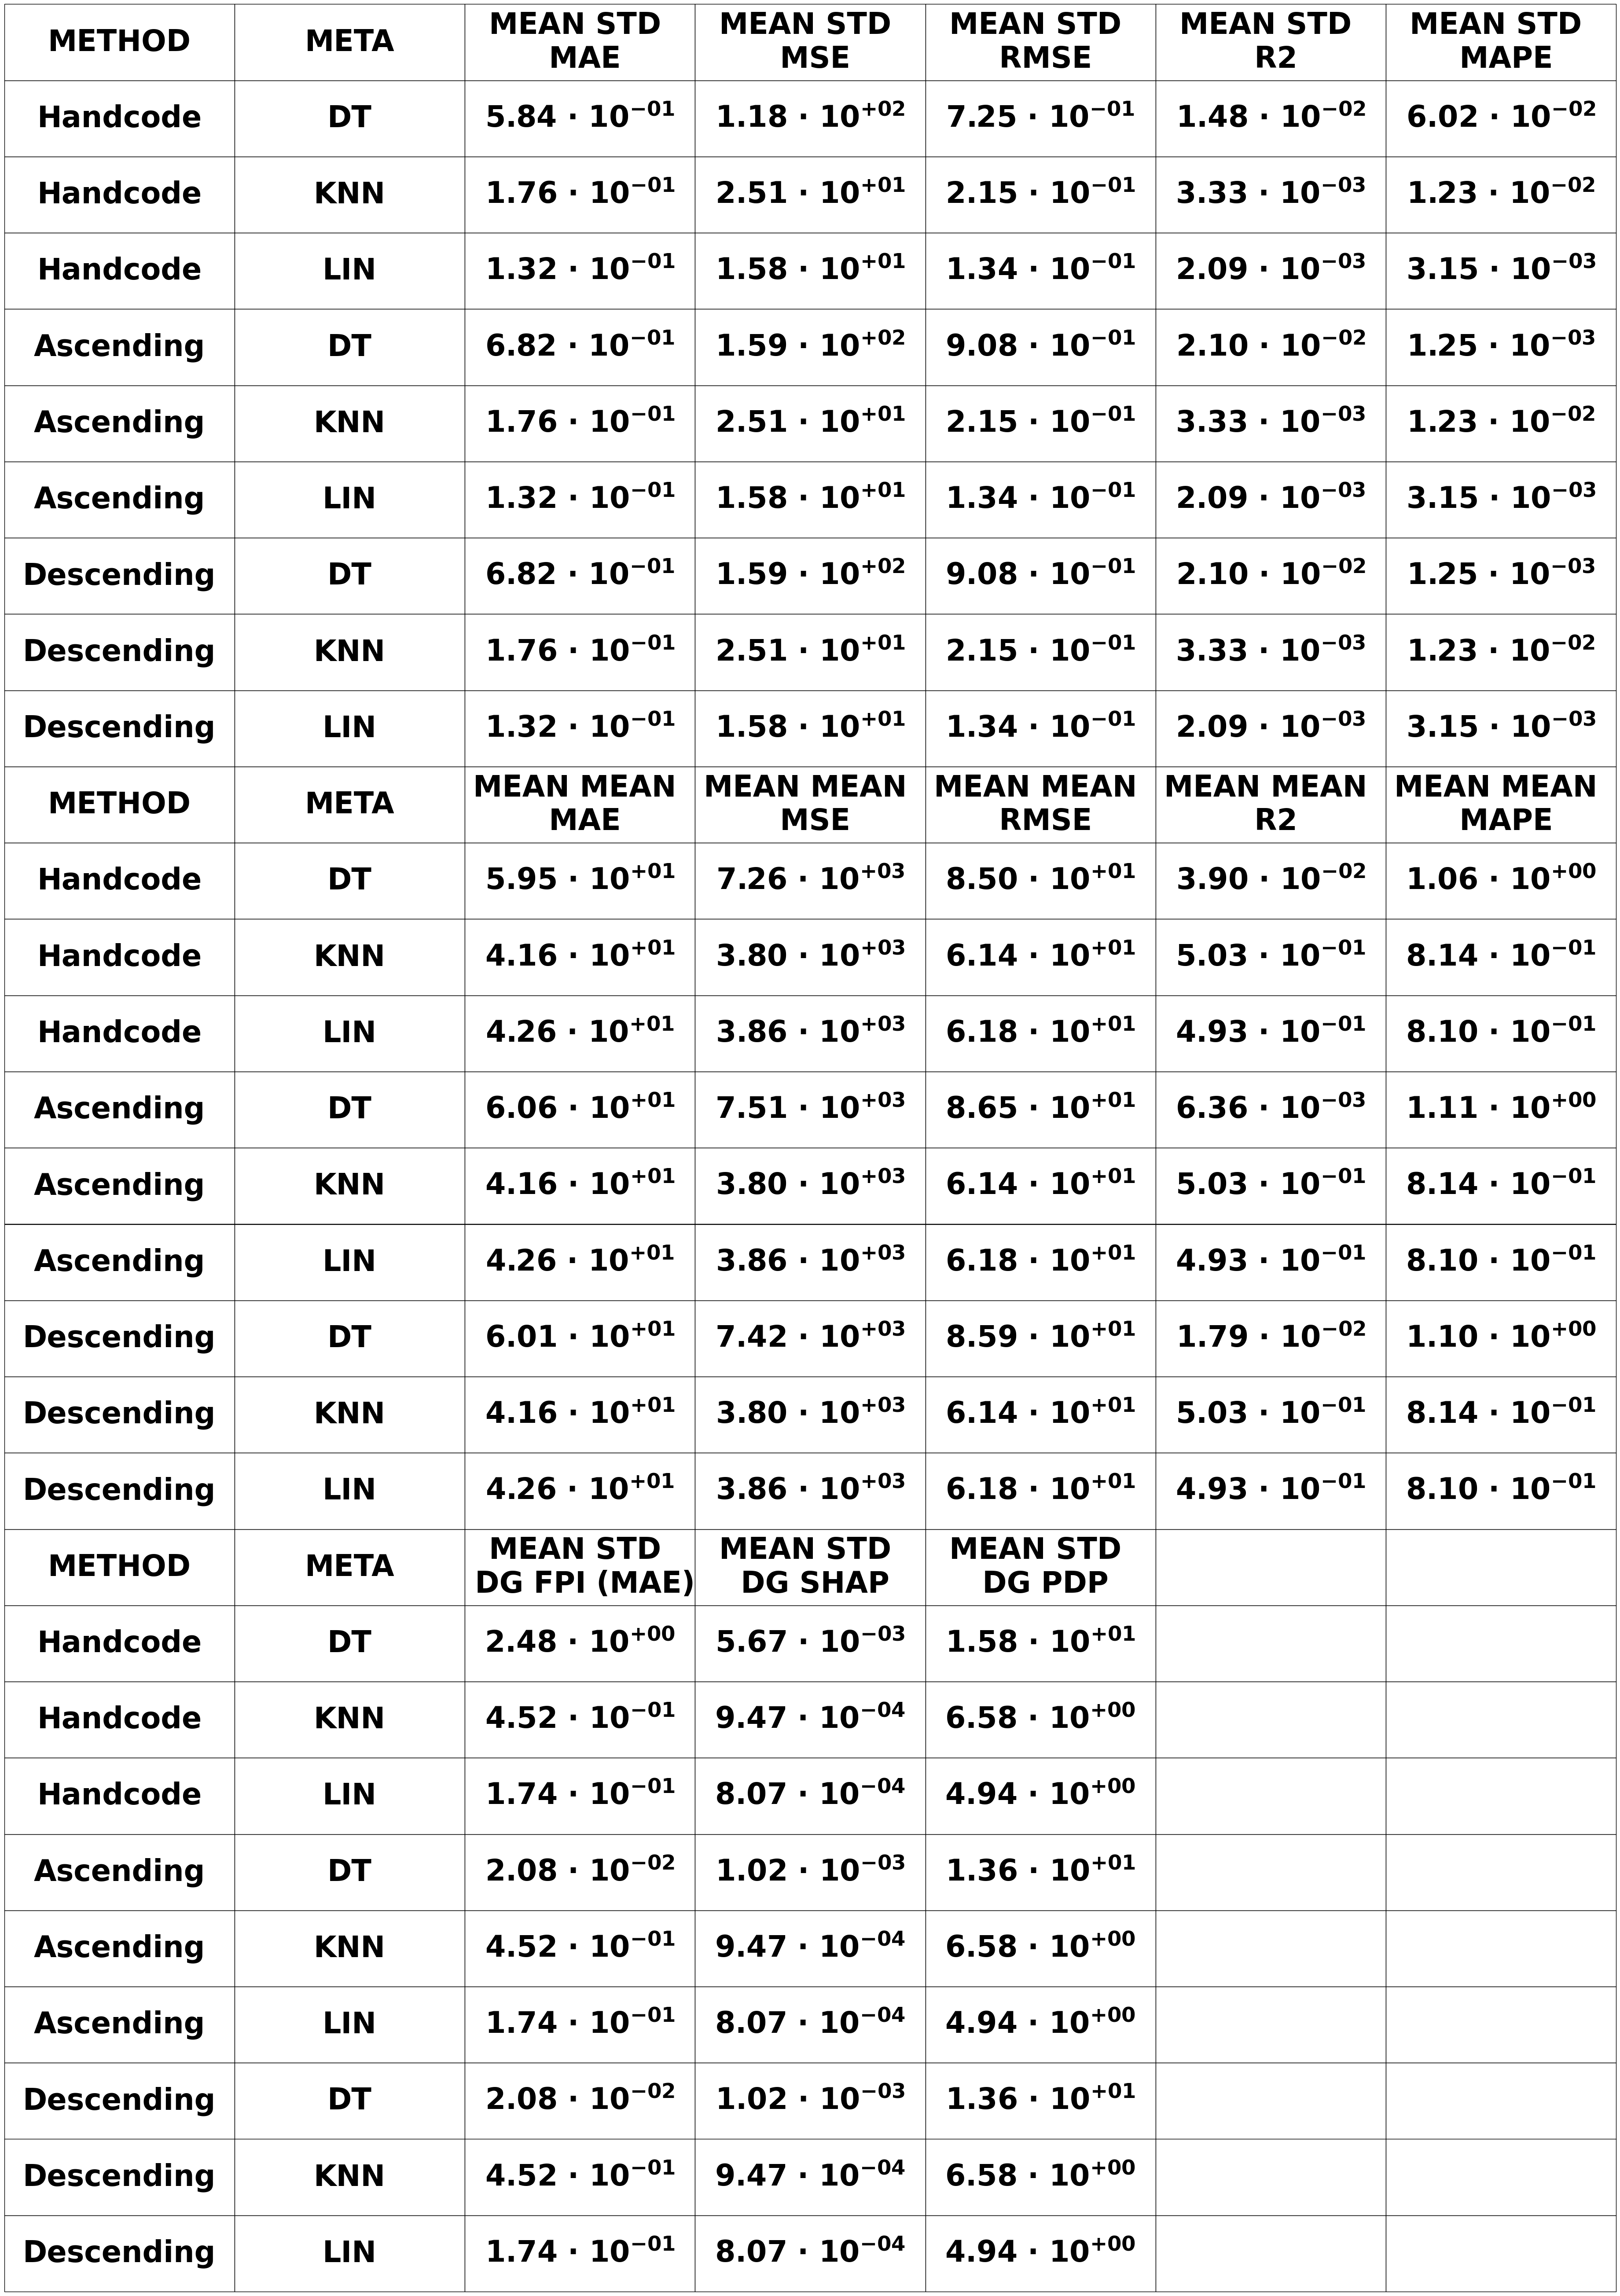

In [9]:
fig_table = plt.figure(figsize=(25,25))
ax_table = plt.subplot2grid((1,1),(0,0),fig=fig_table)

table_mean_dataframe = normal_prediction_mean_dataframe.copy()
table_std_dataframe = normal_prediction_std_dataframe.copy()
table_feature_importance_dataframe = feature_importance_dataframe.copy()

table_list = [table_std_dataframe,table_mean_dataframe,table_feature_importance_dataframe]

# change format
for table_dataframe in table_list:
    for column in table_dataframe.columns:
        if column not in ['METHOD','META','Holder0','Holder1']: 
            table_dataframe[column] = table_dataframe[column].map(lambda x: f'{float(x):.2e}'.split('e')[0] + u' \xb7 ' + '10' + f"$^{{{f'{float(x):.2e}'.split('e')[1]}}}$" if x != 0 else 0)

# combine 2 tables
combined_table_values = []
for table_dataframe in table_list:
    for row_count,row in enumerate(table_dataframe.values):
        # if it is the first row, append the columns
        if row_count == 0:
            added_column_list = []
            for values in table_dataframe.columns:
                if 'MEAN MEAN' in values:
                    added_column = 'MEAN MEAN'+' \n'+values.split('MEAN MEAN')[1]
                    added_column_list.append(added_column)
                elif 'MEAN STD' in values:
                    added_column = 'MEAN STD'+' \n'+values.split('MEAN STD')[1]
                    added_column_list.append(added_column)
                else:
                    added_column_list.append(values)
            added_column_list = np.asarray(added_column_list)
            combined_table_values.append(added_column_list)
        combined_table_values.append(row)
combined_table_values = np.asarray(combined_table_values)

# use first row as column, rest as values
combined_table_dataframe = pd.DataFrame(data=combined_table_values[1:,0:],columns=combined_table_values[0,0:]).map(lambda x: x if x not in ['Holder0','Holder1'] else '')
combined_table_dataframe.to_csv('Final results.csv')

# draw table
the_table = ax_table.table(cellText=combined_table_dataframe.values,colLabels=combined_table_dataframe.columns,cellLoc='center',loc='center') # center allows plotting in middle

# set table parameters
cell_dict = the_table.get_celld()
for row,col in cell_dict:
    cell_dict[(row,col)].set_height(0.03)
    cell_dict[(row,col)].set_width(0.09)
    # cell_dict[(row,col)].get_text().set_rotation(45)
the_table.auto_set_font_size(False)
the_table.set_fontsize(32*1.5)
the_table.scale(2*1.5,2*1.5)

# figure parameters
ax_table.axis('off')
ax_table.axis('tight')
fig_table.patch.set_visible(False)
fig_table.tight_layout()
plt.show()